In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
particles = ['electron','zee','jets','mb','electron_mb','zee_mb','jets_mb']
steps = ['generation', 'simulation','digitalization','reconstruction']

In [3]:
totalTime = {particle: [[],[],[],[],[]] for particle in particles}
sumDict = {particle: list() for particle in particles}
media = list()
std = list()

In [4]:
for particle in particles:
    data = np.load('/home/juan/lorenzetti/tempo/login/'+particle+'.npy',allow_pickle='TRUE').item()
    for i in range(5):
        time=list()
        for step in steps:
            if particle == 'electron_mb' and (step == 'generation' or step == 'simulation'): continue
            elif particle == 'zee_mb' and (step == 'generation' or step == 'simulation'): continue
            elif particle == 'jets_mb' and (step == 'generation' or step == 'simulation'): continue
            elif particle == 'mb' and (step == 'digitalization' or step == 'reconstruction'): continue
            else: 
                time.append(data[step][i])
        totalTime[particle][i].append(time)

In [5]:
for particle in particles:
    for i in range(5):
        sumDict[particle].append(sum(totalTime[particle][i][0]))
    media.append(np.mean(sumDict[particle]))
    std.append(np.std(sumDict[particle]))
particles = ['e', 'Zee', 'JF17', 'MB','eMB','ZeeMB','JF17MB']

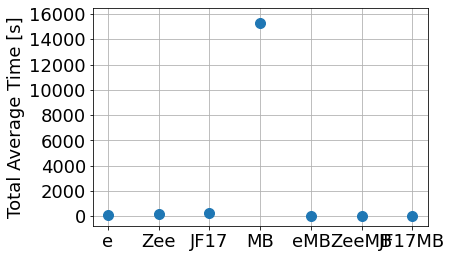

In [6]:
plt.errorbar(particles, media, yerr=std, fmt='o',elinewidth=3, markersize=10);
plt.grid()
plt.ylabel('Total Average Time [s]',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()